In [1]:
import os, sys

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import numpy as np
import astropy.units as u

smallfont = 12
largefont = 14

mpl.rcParams['axes.labelsize'] = largefont
mpl.rcParams['legend.fontsize'] = smallfont
mpl.rcParams['xtick.labelsize'] = smallfont
mpl.rcParams['ytick.labelsize'] = smallfont


In [2]:
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Teaching/Resources/MyDemos')

Mounted at /content/drive


In [3]:
x = np.linspace(0,10,50)
xmax = max(x)
nx = len(x)
y = np.linspace(0,7,7)

center_x,center_y = 5,3.5

In [4]:
def plot_efield(ax,e_color="C4"):
  for yval in y:
    ax.plot(x,np.full(nx,fill_value=yval),'-',color=e_color,zorder=-100)
    ax.plot(xmax,yval,">",color=e_color)

  ax.axis("off")

In [5]:
def calc_U(efield,pval,rad_phi):
  return -1* efield * pval * np.cos(rad_phi)

In [6]:
def calc_tau(efield,pval,rad_phi):
  # return np.abs(efield * pval * np.sin(rad_phi))
  return efield * pval * np.sin(rad_phi)

In [7]:
def plot_dipole(ax,p_color="C2",length=6,phi=0,efield=5e5,pval=2e-29):
  dhalf = length/2
  rad_phi = phi * np.pi / 180

  dx = length * np.cos(rad_phi)
  dy = length * np.sin(rad_phi)

  x = center_x - dx / 2
  y = center_y - dy / 2

  # print(x,y)
  # print(dx,dy)
  # print(-1*x,-1*y)

  # plt.plot([x,y],[-1*x,-1*y],'-',color=p_color)
  arrow = mpl.patches.Arrow(x, y, dx, dy, color=p_color,width=0.5,zorder=3)
  ax.add_patch(arrow)


  offset = 2.5
  if rad_phi>=0:
    arc = mpl.patches.Arc((center_x, center_y),offset,offset,theta1=0,theta2=phi,zorder=5,lw=2)
  else:
    arc = mpl.patches.Arc((center_x, center_y),offset,offset,theta1=phi,theta2=0,zorder=5,lw=2)
  ax.add_patch(arc)

  Uval = calc_U(efield,pval,rad_phi)
  tau = calc_tau(efield,pval,rad_phi)

  # ax.set_title(r"$\Phi$="+f"{phi:.0f} deg, U={Uval:.2e} J, "+r"$\vert\tau\vert$="+f"{tau:.2e} Nm")
  ax.set_title(r"$\Phi$="+f"{phi:.0f} deg, U={Uval:.2e} J, "+r"$\tau$="+f"{tau:.2e} Nm")
  # ax.text(center_x + offset, center_y+offset,r"$\Phi$")

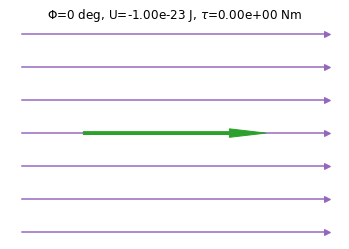

In [9]:
plt.figure()
ax = plt.subplot(111)
plot_efield(ax)
plot_dipole(ax,phi=0)

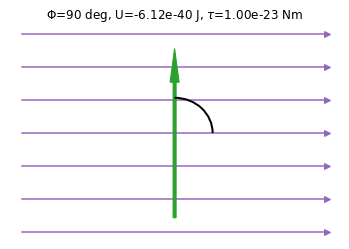

In [13]:
plt.figure()
ax = plt.subplot(111)
plot_efield(ax)
plot_dipole(ax,phi=90)

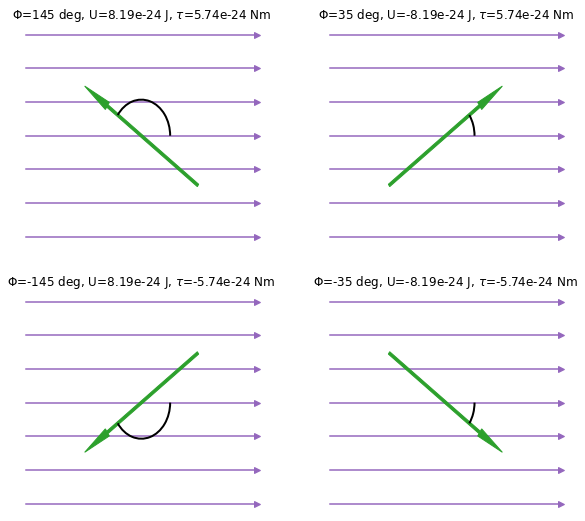

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(10,9))
axes = axes.flatten()


for i,phi in enumerate([145, 35, -145, -35]):
  plot_efield(axes[i])
  plot_dipole(axes[i],phi=phi)

In [ ]:
for i,phi in enumerate([145, 35, -145, -35]):
  plt.figure()
  ax = plt.subplot(111)
  plot_efield(ax)
  plot_dipole(ax,phi=phi)
  plt.savefig(f"dipole_efield_phi{phi:.0f}.png",bbox_inches="tight",dpi=600)
  plt.close()

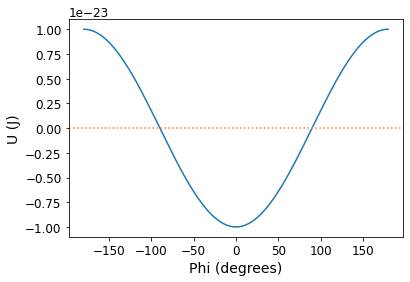

In [ ]:
efield=5e5
pval=2e-29
rad_phi_array = np.linspace(-1*np.pi,1*np.pi,300)
phi_array = rad_phi_array * 180 / np.pi

uval = calc_U(efield,pval,rad_phi_array)
plt.plot(phi_array,uval)
ax = plt.gca()
ax.axhline(0,linestyle=":",color="C1")
plt.xlabel("Phi (degrees)")
plt.ylabel("U (J)")
plt.savefig("dipole_efield_potentialenergy.png",bbox_inches="tight",dpi=600)

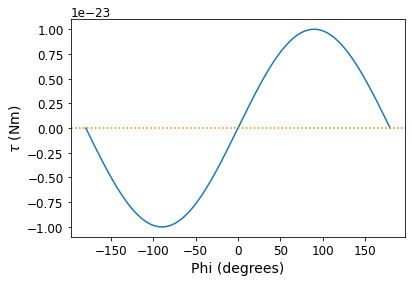

In [ ]:
torque = calc_tau(efield,pval,rad_phi_array)
plt.plot(phi_array,torque)
ax = plt.gca()
ax.axhline(0,linestyle=":",color="C1")
plt.xlabel("Phi (degrees)")
plt.ylabel(r"$\tau$ (Nm)")
plt.savefig("dipole_efield_torque.png",bbox_inches="tight",dpi=600)

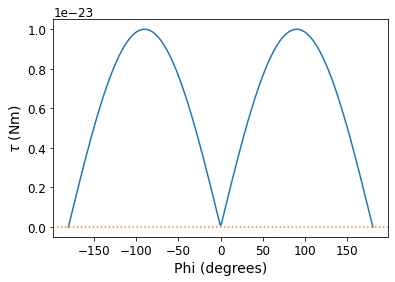

In [ ]:

torque = calc_tau(efield,pval,rad_phi_array)
plt.plot(phi_array,np.abs(torque))
ax = plt.gca()
ax.axhline(0,linestyle=":",color="C1")
plt.xlabel("Phi (degrees)")
plt.ylabel(r"$\tau$ (Nm)")
plt.savefig("dipole_efield_torqueabs.png",bbox_inches="tight",dpi=600)